In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

In [5]:
df = sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

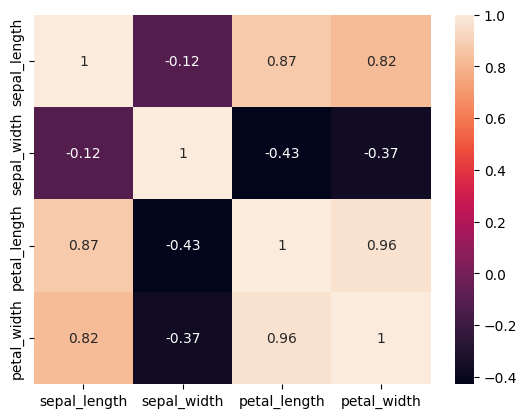

In [9]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True)

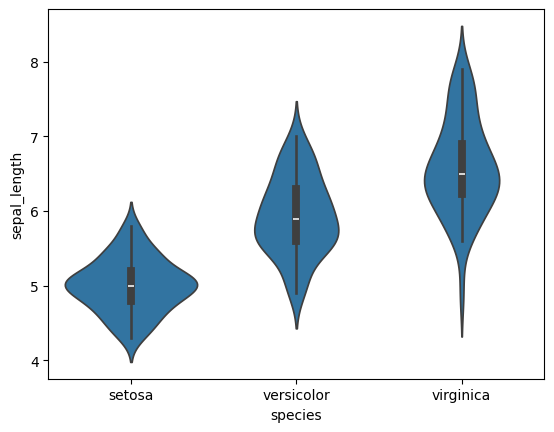

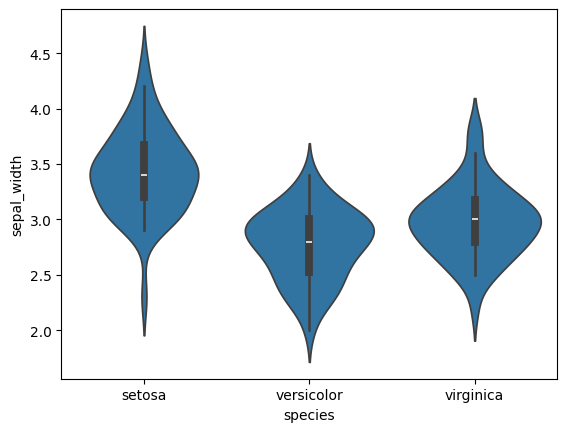

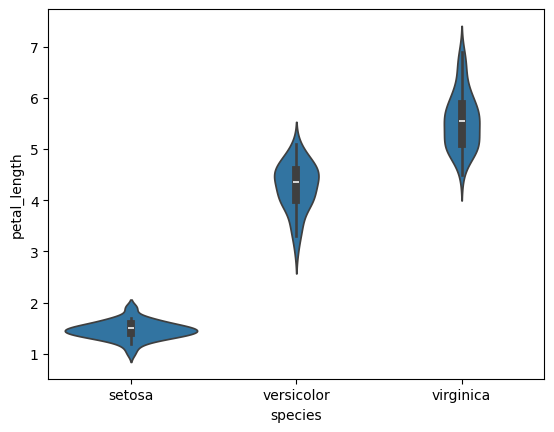

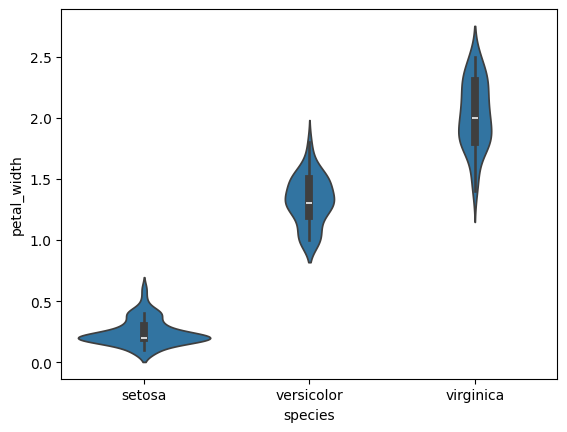

In [17]:
for _ in df.select_dtypes('number').columns:
    sns.violinplot(x='species', y=_, data=df)
    plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'], axis=1), df['species'], test_size=.2, random_state=42)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# here i will test different params with knn

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# candinate columns to test
can_cols = [
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    ['petal_width'],
    ['petal_length'],
    ['sepal_length', 'sepal_width', 'petal_width'],
    ['sepal_length', 'petal_width'],
    ['sepal_length', 'sepal_width']
]

In [25]:
Ks = [1, 3, 5, 7]

In [38]:
results = []

In [39]:
# test without standardize
for k in Ks:
    for cols in can_cols:
        for scaling in (True, False):
            if scaling:
                training_data = X_train_scaled
                testing_data = X_test_scaled
            else:
                training_data = X_train
                testing_data = X_test

            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(training_data, y_train)

            y_pred = knn.predict(testing_data)
            
            results.append({
                'k': k,
                'cols': cols,
                'scaled': scaling,
                'precision_score': precision_score(y_test, y_pred, average='macro'),
                'recall_score': recall_score(y_test, y_pred, average='macro'),
                'f1_score': f1_score(y_test, y_pred, average='macro')
            })


In [40]:
for res in results:
    for key, val in res.items():
        print(f'{key}: {val}')
    print('_'*15)

k: 1
cols: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaled: True
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaled: False
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['petal_width']
scaled: True
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['petal_width']
scaled: False
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['petal_length']
scaled: True
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['petal_length']
scaled: False
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['sepal_length', 'sepal_width', 'petal_width']
scaled: True
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
_______________
k: 1
cols: ['sepal_length', 'sepal_width', 'petal_width']
scaled: False
precision_score: 1.0
recall_score: 

In [41]:
new_dic = {
    'k': [res['k'] for res in results],
    'cols': [res['cols'] for res in results],
    'scaled': [res['scaled'] for res in results],
    'precision_score': [res['precision_score'] for res in results],
    'recall_score': [res['recall_score'] for res in results],
    'f1_score': [res['f1_score'] for res in results],
}

In [44]:
results_df = pd.DataFrame(new_dic)

In [47]:
results_df.head(len(results_df))

,k,cols,scaled,precision_score,recall_score,f1_score
0,1,"[sepal_length, sepal_width, petal_length, peta...",True,1.000000,1.000000,1.000000
1,1,"[sepal_length, sepal_width, petal_length, peta...",False,1.000000,1.000000,1.000000
2,1,[petal_width],True,1.000000,1.000000,1.000000
3,1,[petal_width],False,1.000000,1.000000,1.000000
4,1,[petal_length],True,1.000000,1.000000,1.000000
5,1,[petal_length],False,1.000000,1.000000,1.000000
6,1,"[sepal_length, sepal_width, petal_width]",True,1.000000,1.000000,1.000000
7,1,"[sepal_length, sepal_width, petal_width]",False,1.000000,1.000000,1.000000
8,1,"[sepal_length, petal_width]",True,1.000000,1.000000,1.000000
9,1,"[sepal_length, petal_width]",False,1.000000,1.000000,1.000000
